In [2]:
import os
import json
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [11]:
# --- Configuration ---
DATASET_DIR = 'C:/Users/hp/Desktop/AfterShot/Dentalai' 
OUTPUT_DIR = './processed_dataset'
# Set how many images to check per split (e.g., 3). Set to 0 to disable.
VISUAL_CHECK_COUNT = 3

In [12]:
def create_masks():
    """
    Parses JSON annotations to create binary masks for the 'tooth' class.
    """
    print("Starting mask creation process...")
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    for split in ['train', 'valid', 'test']:
        img_dir = os.path.join(DATASET_DIR, split, 'img')
        ann_dir = os.path.join(DATASET_DIR, split, 'ann')
        mask_output_dir = os.path.join(OUTPUT_DIR, f'{split}_masks')
        os.makedirs(mask_output_dir, exist_ok=True)
        
        print(f"\nProcessing '{split}' split...")
        
        checked_count = 0
        annotation_files = [f for f in os.listdir(ann_dir) if f.endswith('.json')]

        for filename in tqdm(annotation_files, desc=f'Creating {split} masks'):
            json_path = os.path.join(ann_dir, filename)
            
            with open(json_path, 'r') as f:
                data = json.load(f)
            
            height, width = data['size']['height'], data['size']['width']
            mask = np.zeros((height, width), dtype=np.uint8)
            
            for obj in data['objects']:
                if obj['classTitle'] == 'Tooth':
                    polygon_coords = obj['points']['exterior']
                    pts = np.array(polygon_coords, dtype=np.int32).reshape((-1, 1, 2))
                    cv2.fillPoly(mask, [pts], 255)
            
            # Visual check block
            if checked_count < VISUAL_CHECK_COUNT:
                original_img_path = os.path.join(img_dir, filename.replace('.json', ''))
                original_img = cv2.imread(original_img_path)
                original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

                plt.figure(figsize=(12, 6))
                plt.subplot(1, 2, 1)
                plt.imshow(original_img)
                plt.title('Original Image')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(mask, cmap='gray')
                plt.title('Generated Mask')
                plt.axis('off')
                
                plt.suptitle(f"Visual Check for: {filename}")
                plt.show()

                checked_count += 1
            
            mask_filename = filename.replace('.json', '.png')
            output_path = os.path.join(mask_output_dir, mask_filename)
            cv2.imwrite(output_path, mask)
            
    print("\n\nPreprocessing complete!")
    print(f"Masks saved in: {os.path.abspath(OUTPUT_DIR)}")

Starting mask creation process...

Processing 'train' split...


Creating train masks:   0%|          | 0/1991 [00:00<?, ?it/s]

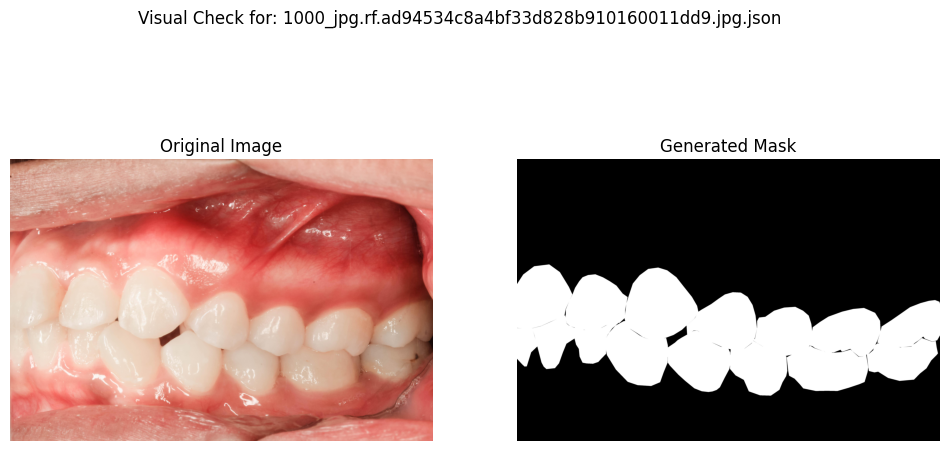

Creating train masks:   0%|          | 1/1991 [00:05<2:47:31,  5.05s/it]

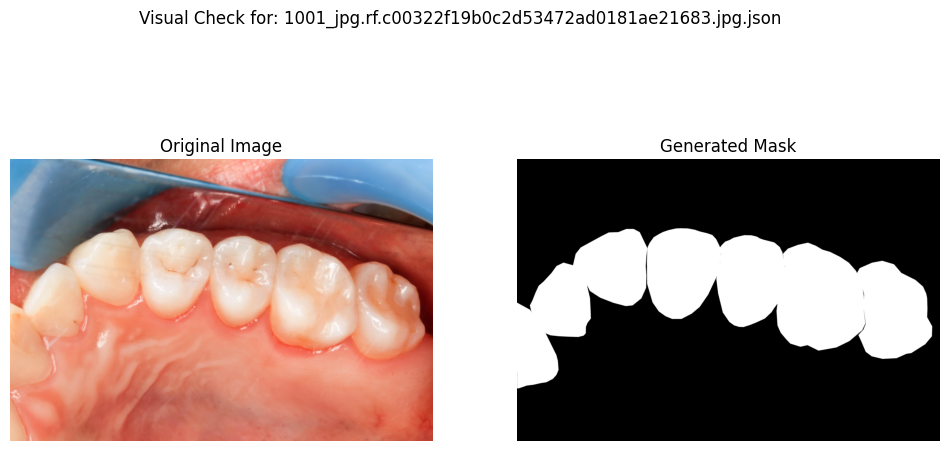

Creating train masks:   0%|          | 2/1991 [00:11<3:13:48,  5.85s/it]

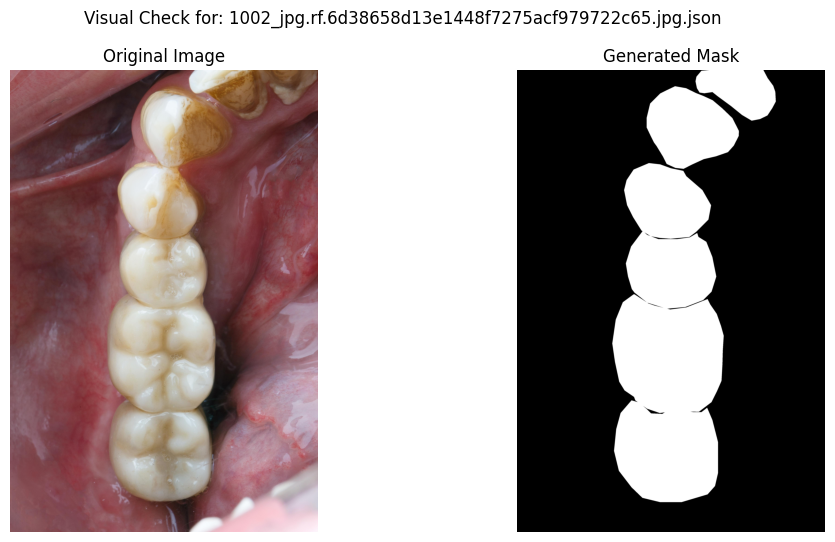

Creating train masks: 100%|██████████| 1991/1991 [01:21<00:00, 24.58it/s] 



Processing 'valid' split...


Creating valid masks:   0%|          | 0/254 [00:00<?, ?it/s]

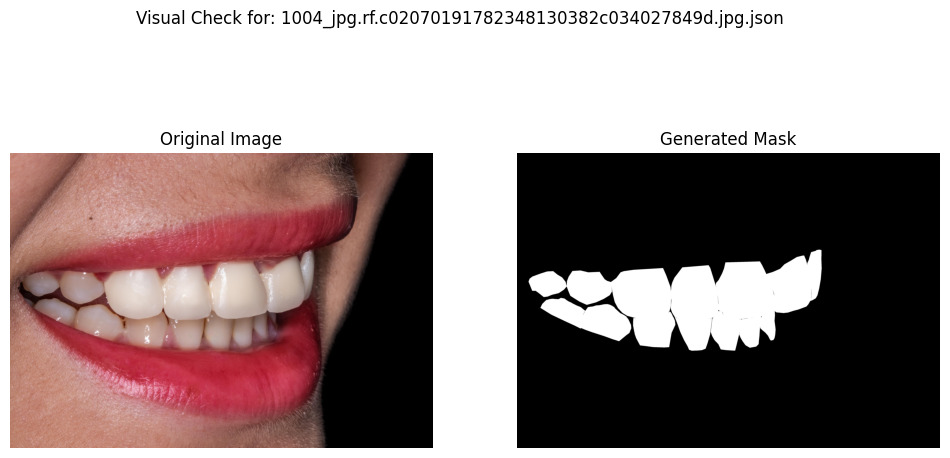

Creating valid masks:   0%|          | 1/254 [00:04<17:39,  4.19s/it]

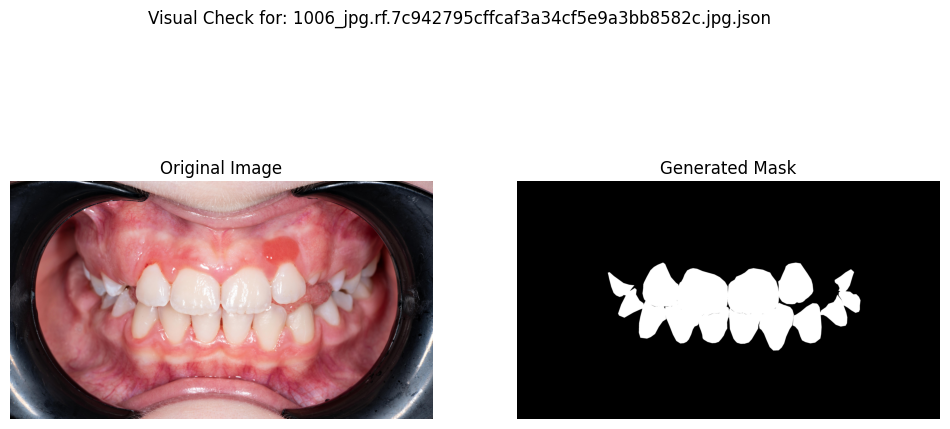

Creating valid masks:   1%|          | 2/254 [00:09<21:07,  5.03s/it]

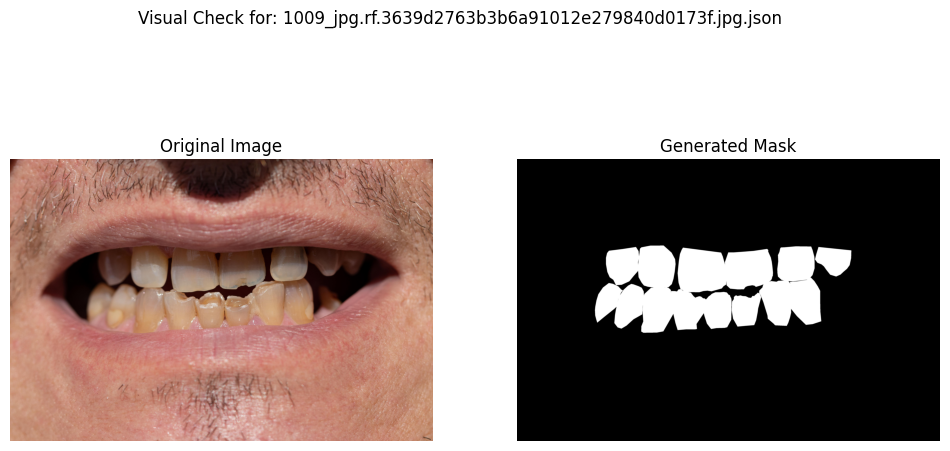

Creating valid masks: 100%|██████████| 254/254 [00:24<00:00, 10.33it/s]



Processing 'test' split...


Creating test masks:   0%|          | 0/250 [00:00<?, ?it/s]

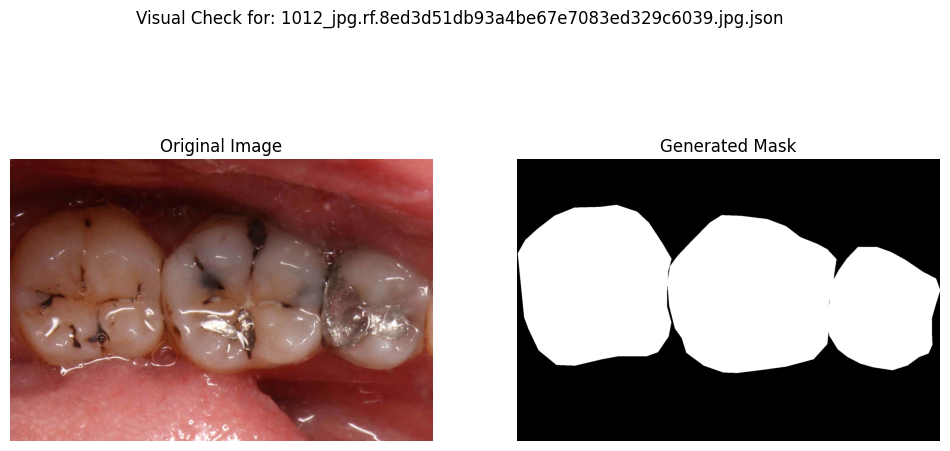

Creating test masks:   0%|          | 1/250 [00:00<03:30,  1.18it/s]

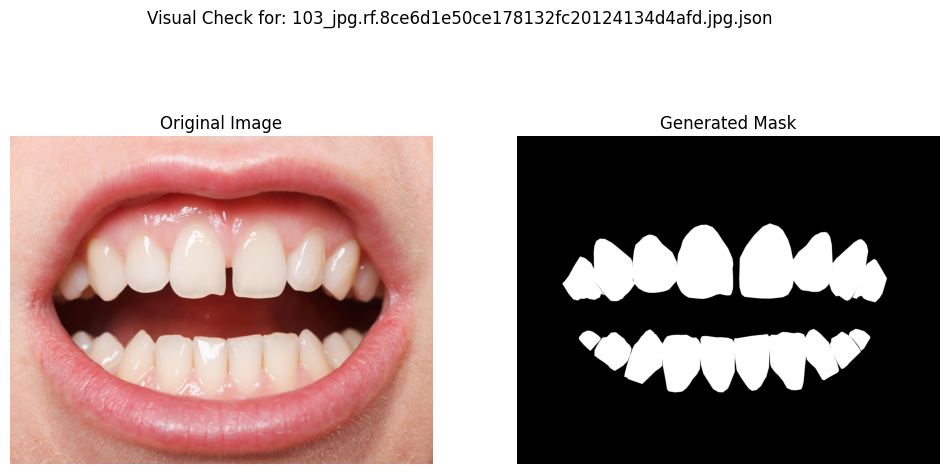

Creating test masks:   1%|          | 2/250 [00:04<11:03,  2.67s/it]

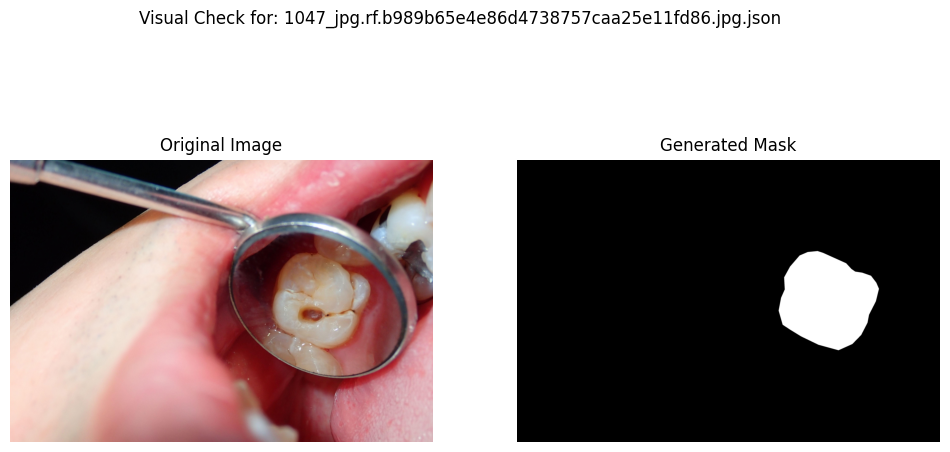

Creating test masks: 100%|██████████| 250/250 [00:16<00:00, 15.38it/s] 



Preprocessing complete!
Masks saved in: c:\Users\hp\Desktop\AfterShot\processed_dataset


In [13]:
# Run the function to create and save all masks
create_masks()

In [10]:
# --- DEBUG CELL: Inspect one JSON file ---

# Make sure this points to your training annotations
ann_dir = os.path.join(DATASET_DIR, 'train', 'ann') 
# Get the first annotation file from the directory
sample_ann_file = os.listdir(ann_dir)[0]
sample_json_path = os.path.join(ann_dir, sample_ann_file)

# Open and print the contents
with open(sample_json_path, 'r') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2)) # 'indent=2' makes it readable

{
  "description": "",
  "tags": [],
  "size": {
    "height": 3051,
    "width": 4577
  },
  "objects": [
    {
      "id": 44663115,
      "classId": 4668095,
      "description": "",
      "geometryType": "polygon",
      "labelerLogin": "inbox@datasetninja.com",
      "createdAt": "2023-09-15T14:11:15.281Z",
      "updatedAt": "2023-09-15T14:11:15.281Z",
      "tags": [],
      "classTitle": "Tooth",
      "points": {
        "exterior": [
          [
            1631,
            2039
          ],
          [
            1708,
            1987
          ],
          [
            1738,
            1959
          ],
          [
            1783,
            1931
          ],
          [
            1835,
            1902
          ],
          [
            1906,
            1860
          ],
          [
            1950,
            1856
          ],
          [
            2000,
            1889
          ],
          [
            2052,
            1941
          ],
          [
